### Embedding

    独热码：数据量大 过于稀疏，映射之间是独立的，没有表现出关联性 
    Embedding：是一种单词编码方法，用低维向量实现了编码， 这种编码通过神经网络训练优化，能表达出单词间的相关性。
    
    tf.keras.layers.Embedding(词汇表大小，编码维度) 
    
    编码维度就是用几个数字表达一个单词 对1-100进行编码， [4] 编码为 [0.25, 0.1, 0.11] 例 ：tf.keras.layers.Embedding(100, 3 )
    
    入Embedding时， x_train维度： [送入样本数， 循环核时间展开步数]


-------------load the model-----------------
Train on 5 samples
Epoch 1/100
5/5 [==============================] - 2s 392ms/sample - loss: 0.6222 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.6139 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.6058 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.5978 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.5898 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.5820 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.5744 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.5668 - sparse_categorical_

Epoch 69/100
5/5 [==============================] - 0s 18ms/sample - loss: 0.3028 - sparse_categorical_accuracy: 1.0000
Epoch 70/100
5/5 [==============================] - 0s 21ms/sample - loss: 0.3005 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 18ms/sample - loss: 0.2982 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 17ms/sample - loss: 0.2960 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 18ms/sample - loss: 0.2937 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 19ms/sample - loss: 0.2915 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 17ms/sample - loss: 0.2894 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 15ms/sample - loss: 0.2873 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
5/5 [======================

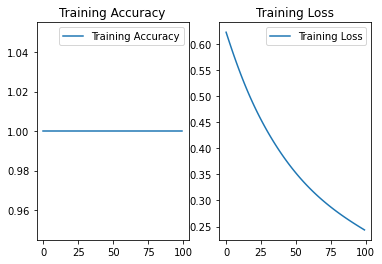

input the number of test alphabet:5
input test alphabet:a
a->b
input test alphabet:d
d->e
input test alphabet:e
e->a
input test alphabet:c
c->d
input test alphabet:e
e->a


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
import matplotlib.pyplot as plt
import os

input_word = "abcde"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}  # 单词映射到数值id的词典

x_train = [w_to_id['a'], w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e']]
y_train = [w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e'], w_to_id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合Embedding输入要求：[送入样本数， 循环核时间展开步数] ，
# 此处整个数据集送入所以送入，送入样本数为len(x_train)；输入1个字母出结果，循环核时间展开步数为1。
x_train = np.reshape(x_train, (len(x_train), 1))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    Embedding(5, 2),
    SimpleRNN(3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/run_embedding_1pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

############### predict #############

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [w_to_id[alphabet1]]
    # 使alphabet符合Embedding输入要求：[送入样本数， 循环核时间展开步数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入1个字母出结果，循环核时间展开步数为1。
    alphabet = np.reshape(alphabet, (1, 1))
    result = model.predict(alphabet)
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])


-------------load the model-----------------
Train on 22 samples
Epoch 1/100
22/22 [==============================] - 2s 95ms/sample - loss: 0.0176 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0175 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0174 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0173 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
22/22 [==============================] - 0s 4ms/sample - loss: 0.0172 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0171 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
22/22 [==============================] - 0s 4ms/sample - loss: 0.0170 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
22/22 [==============================] - 0s 4ms/sample - loss: 0.0169 - sparse_cat

Epoch 69/100
22/22 [==============================] - 0s 4ms/sample - loss: 0.0122 - sparse_categorical_accuracy: 1.0000
Epoch 70/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0121 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0121 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0120 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
22/22 [==============================] - 0s 4ms/sample - loss: 0.0120 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0119 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0119 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
22/22 [==============================] - 0s 3ms/sample - loss: 0.0118 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
22/22 [============

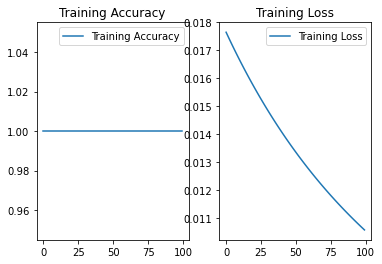

input the number of test alphabet:5
input test alphabet:abcd
abcd->e
input test alphabet:hijk
hijk->l
input test alphabet:mnop
mnop->q


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
import matplotlib.pyplot as plt
import os

input_word = "abcdefghijklmnopqrstuvwxyz"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4,
           'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9,
           'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14,
           'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19,
           'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}  # 单词映射到数值id的词典

training_set_scaled = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                       21, 22, 23, 24, 25]

x_train = []
y_train = []

for i in range(4, 26):
    x_train.append(training_set_scaled[i - 4:i])
    y_train.append(training_set_scaled[i])

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合Embedding输入要求：[送入样本数， 循环核时间展开步数] ，
# 此处整个数据集送入所以送入，送入样本数为len(x_train)；输入4个字母出结果，循环核时间展开步数为4。
x_train = np.reshape(x_train, (len(x_train), 4))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    Embedding(26, 2),
    SimpleRNN(10),
    Dense(26, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_embedding_4pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

################# predict ##################

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [w_to_id[a] for a in alphabet1]
    # 使alphabet符合Embedding输入要求：[送入样本数， 时间展开步数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入4个字母出结果，循环核时间展开步数为4。
    alphabet = np.reshape(alphabet, (1, 4))
    result = model.predict([alphabet])
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])